In [192]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.cm as cm


Collect the data from each line in a single csv

In [193]:
line0 = pd.read_csv('line0_apr25_loc.csv')
line1 = pd.read_csv('line1_apr25_loc.csv')
line2 = pd.read_csv('line2_apr26_loc.csv')
line3 = pd.read_csv('line3_apr26_loc.csv')
line4 = pd.read_csv('line4_apr26_loc.csv')
line5 = pd.read_csv('line5_apr25_loc.csv')
line6 = pd.read_csv('line6_apr25_loc.csv')
noise_data = pd.read_csv('noise_floor_apr26_loc.csv') #measured without a tag
data_list = [line0,line1,line2,line3,line4,line5,line6]
RSS_data = pd.concat(data_list)
RSS_data.drop('Unnamed: 0', inplace=True, axis=1) #drop the index column
m,n = RSS_data.shape

In [194]:
RSS_data.head()

,Py0,Pz0,Py1,Pz1,Py2,Pz2,Py3,Pz3,time,tag_height,...,rx0_y,rx1_x,rx1_y,rx2_x,rx2_y,rx3_x,rx3_y,x,y,distance
0,-59.42669,-62.99539,-87.03321,-79.13359,-63.26446,-66.97568,-76.72871,-76.27890,0.056499,0.36,...,5.0,0.5,13.6,8.5,21.9,17.5,14,7.8,1.800000,0.000000
1,-57.99727,-60.94916,-94.06674,-78.76073,-62.98947,-67.26346,-79.78130,-75.42463,0.111456,0.36,...,5.0,0.5,13.6,8.5,21.9,17.5,14,7.8,1.813033,0.013033
2,-56.18848,-59.44964,-86.23058,-75.48536,-63.56425,-67.71440,-75.92373,-75.18044,0.166953,0.36,...,5.0,0.5,13.6,8.5,21.9,17.5,14,7.8,1.826066,0.026066
3,-54.75283,-58.67638,-81.21359,-72.95277,-64.74144,-67.12129,-71.82654,-75.26347,0.221362,0.36,...,5.0,0.5,13.6,8.5,21.9,17.5,14,7.8,1.839100,0.039100
4,-53.39656,-58.16557,-78.45762,-71.60380,-64.18268,-65.69917,-68.26437,-75.39499,0.274763,0.36,...,5.0,0.5,13.6,8.5,21.9,17.5,14,7.8,1.852133,0.052133


Find the mean of the noise floor for each channel 

In [195]:
noise_data = noise_data[['Py0','Pz0','Py1','Pz1','Py2','Pz2','Py3','Pz3']] #only need the RSS readings
noise_data.head()

,Py0,Pz0,Py1,Pz1,Py2,Pz2,Py3,Pz3
0,-99.72743,-85.60629,-94.62137,-87.21571,-75.49642,-77.93474,-75.18796,-82.86136
1,-97.68116,-86.15174,-94.78320,-87.00515,-74.99036,-78.20930,-75.03316,-84.78611
2,-95.71858,-86.09019,-91.93809,-87.09985,-74.52148,-77.64372,-75.03088,-84.00237
3,-96.56175,-85.99899,-92.62894,-87.12193,-74.90018,-78.11917,-75.27127,-83.18758
4,-97.27094,-86.38935,-93.03093,-86.93593,-75.02506,-77.74480,-75.41042,-83.16035


In [196]:
avg_noise = noise_data[['Py0','Pz0','Py1','Pz1','Py2','Pz2','Py3','Pz3']].mean(axis = 0).reset_index()
avg_noise.to_csv('avg_noise.csv', index = False)
avg_noise.head()

,index,0
0,Py0,-98.818685
1,Pz0,-86.015926
2,Py1,-93.639735
3,Pz1,-86.898200
4,Py2,-75.176623


Write the combined data from all lines to a new csv

In [197]:
RSS_data.to_csv('RSS_data.csv',index = False)
RSS_data.head()

,Py0,Pz0,Py1,Pz1,Py2,Pz2,Py3,Pz3,time,tag_height,...,rx0_y,rx1_x,rx1_y,rx2_x,rx2_y,rx3_x,rx3_y,x,y,distance
0,-59.42669,-62.99539,-87.03321,-79.13359,-63.26446,-66.97568,-76.72871,-76.27890,0.056499,0.36,...,5.0,0.5,13.6,8.5,21.9,17.5,14,7.8,1.800000,0.000000
1,-57.99727,-60.94916,-94.06674,-78.76073,-62.98947,-67.26346,-79.78130,-75.42463,0.111456,0.36,...,5.0,0.5,13.6,8.5,21.9,17.5,14,7.8,1.813033,0.013033
2,-56.18848,-59.44964,-86.23058,-75.48536,-63.56425,-67.71440,-75.92373,-75.18044,0.166953,0.36,...,5.0,0.5,13.6,8.5,21.9,17.5,14,7.8,1.826066,0.026066
3,-54.75283,-58.67638,-81.21359,-72.95277,-64.74144,-67.12129,-71.82654,-75.26347,0.221362,0.36,...,5.0,0.5,13.6,8.5,21.9,17.5,14,7.8,1.839100,0.039100
4,-53.39656,-58.16557,-78.45762,-71.60380,-64.18268,-65.69917,-68.26437,-75.39499,0.274763,0.36,...,5.0,0.5,13.6,8.5,21.9,17.5,14,7.8,1.852133,0.052133


In [198]:
line0 = line0.to_numpy()
Y = line0[:,-3:-1]
line0

array([[ 0.00000000e+00, -5.94266900e+01, -6.29953900e+01, ...,
         7.80000000e+00,  1.80000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -5.79972700e+01, -6.09491600e+01, ...,
         7.80000000e+00,  1.81303317e+00,  1.30331750e-02],
       [ 2.00000000e+00, -5.61884800e+01, -5.94496400e+01, ...,
         7.80000000e+00,  1.82606635e+00,  2.60663510e-02],
       ...,
       [ 1.68600000e+03, -8.38639800e+01, -8.36501200e+01, ...,
         7.80000000e+00,  2.37739337e+01,  2.19739336e+01],
       [ 1.68700000e+03, -8.42601800e+01, -8.23675600e+01, ...,
         7.80000000e+00,  2.37869668e+01,  2.19869668e+01],
       [ 1.68800000e+03, -8.57467300e+01, -8.17639900e+01, ...,
         7.80000000e+00,  2.38000000e+01,  2.20000000e+01]])

In [247]:
def plot_line(ax,rss,coords):
    x = coords[:,0]
    y = coords[:,1]
    # ax.scatter3D(x,y,rss,c=rss,cmap = 'Greens')
    # ax.scatter3D(x,y,rss,c=rss,cmap = 'Reds')
    ax.scatter3D(x,y,rss,c=rss)

def plot_room(rx_index = 0,line_list = None, angle1 = 90, angle2 = 135):
    assert rx_index <= 3 and rx_index >=0 , "Receiver index should be a value between 0 and 3."
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'),figsize = (12,8))
    ax.view_init(angle1, angle2)
    for line in line_list:
        line_arr = line.to_numpy()
        coords = line_arr[:,-3:-1]
        Py = line_arr[:,2*rx_index+1]
        Pz = line_arr[:,2*rx_index+2]
        rss = np.maximum(Py,Pz)
        plot_line(ax,rss,coords)
    #add the receiver's position
    x_pos = line_list[0]['rx' + str(rx_index) + '_x'][0]
    y_pos = line_list[0]['rx' + str(rx_index) + '_y'][0]
    rx_height = -110 #constant for displaying purposes for now
    ax.scatter3D(x_pos,y_pos,rx_height, c='blue', s = 40, label = 'rx' + str(rx_index))
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('RSS')
    # fig.colorbar(cm.ScalarMappable(),ax=ax)
    ax.legend()

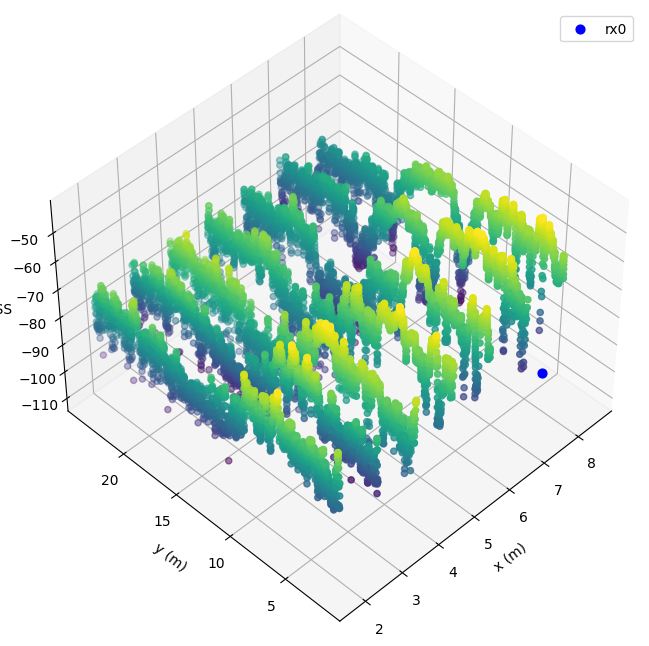

In [248]:
plot_room(rx_index = 0, line_list = data_list, angle1 = 45, angle2 = 225)

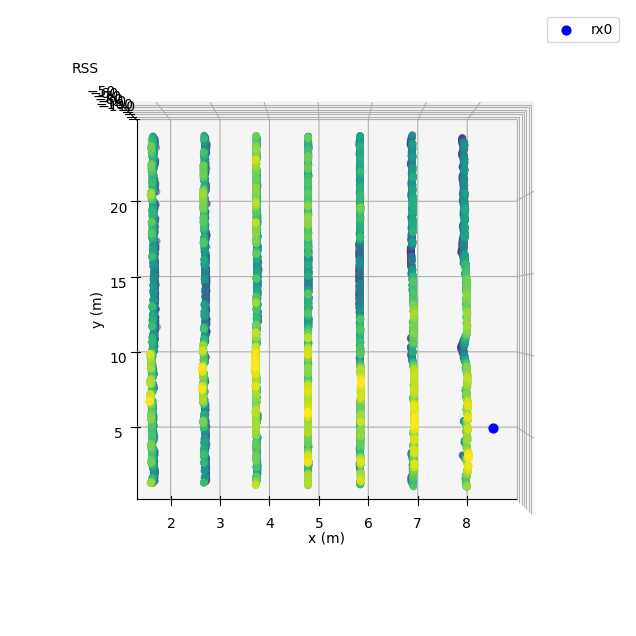

In [249]:
plot_room(rx_index = 0, line_list = data_list, angle1 = 90, angle2 = 270)

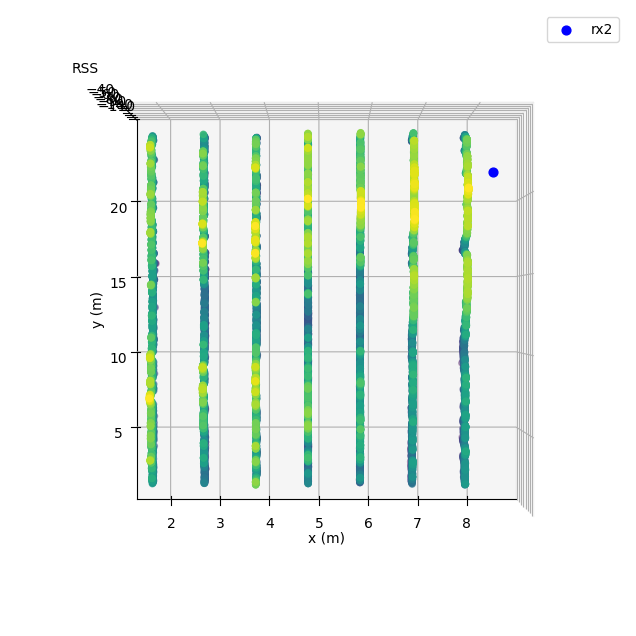

In [226]:
plot_room(rx_index = 2, line_list = data_list, angle1 = 90, angle2 = 270)

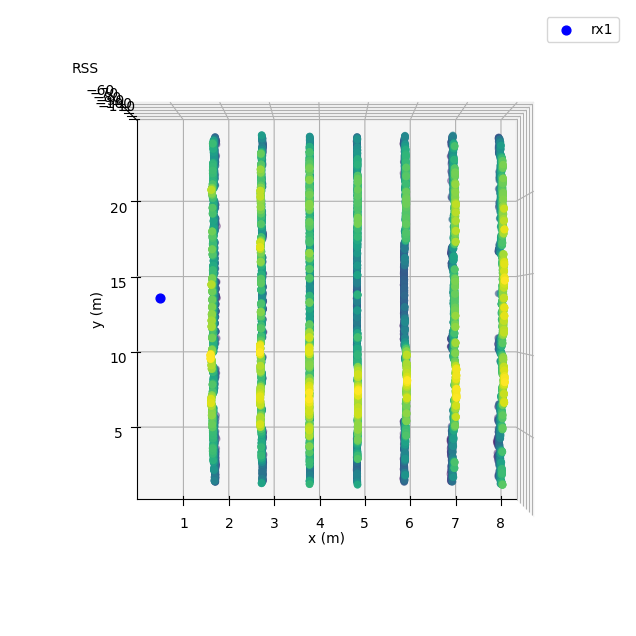

In [227]:
plot_room(rx_index = 1, line_list = data_list, angle1 = 90, angle2 = 270)